In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Collection

In [63]:
stats = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Project-3\master.csv")
stats.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 2. Data Cleaning and Pre-Processing

In [64]:
# Remove unecessary characters from the column title
stats.columns = stats.columns.str.title()
stats.columns = stats.columns.str.replace(' ($)', '')
stats.columns = stats.columns.str.replace(' ($)', '')
stats.columns = stats.columns.str.replace(' ', '_')

In [65]:
stats.columns

Index(['Country', 'Year', 'Sex', 'Age', 'Suicides_No', 'Population',
       'Suicides/100K_Pop', 'Country-Year', 'Hdi_For_Year', '_Gdp_For_Year_',
       'Gdp_Per_Capita', 'Generation'],
      dtype='object')

In [66]:
stats.rename(columns={'_Gdp_For_Year_':'Gdp_For_Year'}, inplace = True)

In [67]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            27820 non-null  object 
 1   Year               27820 non-null  int64  
 2   Sex                27820 non-null  object 
 3   Age                27820 non-null  object 
 4   Suicides_No        27820 non-null  int64  
 5   Population         27820 non-null  int64  
 6   Suicides/100K_Pop  27820 non-null  float64
 7   Country-Year       27820 non-null  object 
 8   Hdi_For_Year       8364 non-null   float64
 9   Gdp_For_Year       27820 non-null  object 
 10  Gdp_Per_Capita     27820 non-null  int64  
 11  Generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [68]:
# Select only the necessary columns
stats = stats[['Country', 'Year', 'Sex', 'Age', 'Suicides_No', 'Population',
       'Suicides/100K_Pop', 'Hdi_For_Year', 'Gdp_For_Year',
       'Gdp_Per_Capita', 'Generation']]

In [69]:
# Remove duplicate rows
stats = stats[~stats.duplicated()]

### Check for potential outliers

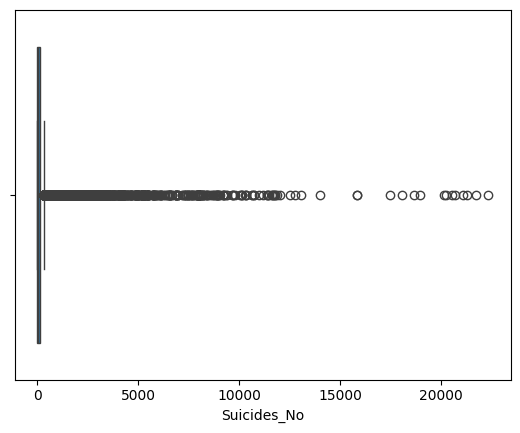

In [70]:
sns.boxplot(x=stats['Suicides_No']);

In [71]:
# IQR rule to use for the skewed distribution
q25, q75 = np.percentile(stats['Suicides_No'], (25,75))
iqr = q75 - q25 
min_1 = q25 - 1.5*iqr 
max_1 = q75 + 1.5*iqr

In [72]:
# Count of outliers
stats['Suicides_No'].loc[stats['Suicides_No']>max_1].count() 

3909

* count of outliers is almost 14% of the total data. We will retain these values for further analysis.

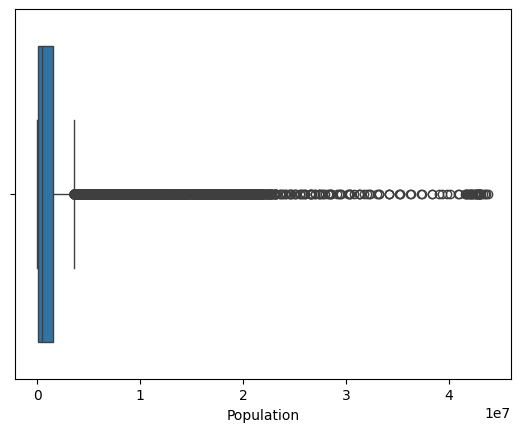

In [73]:
sns.boxplot(x=stats['Population']);

In [74]:
# IQR rule to use for the skewed distribution
q25, q75 = np.percentile(stats['Population'], (25,75))
iqr = q75 - q25 
min_2 = q25 - 1.5*iqr 
max_2 = q75 + 1.5*iqr

In [75]:
# Count of outliers
stats['Population'].loc[stats['Population']>max_2].count() 

4180

* Count of outliers is 15% of the total data. We will retain these values.

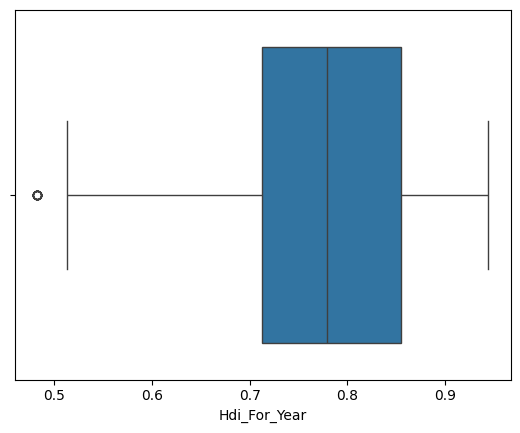

In [76]:
sns.boxplot(x=stats['Hdi_For_Year']);

In [77]:
# IQR rule to use for the skewed distribution
q25, q75 = np.percentile(stats['Hdi_For_Year'], (25,75))
iqr = q75 - q25 
min_3 = q25 - 1.5*iqr 
max_3 = q75 + 1.5*iqr
# Count of outliers
stats['Hdi_For_Year'].loc[stats['Hdi_For_Year']<min_3].count() 

0

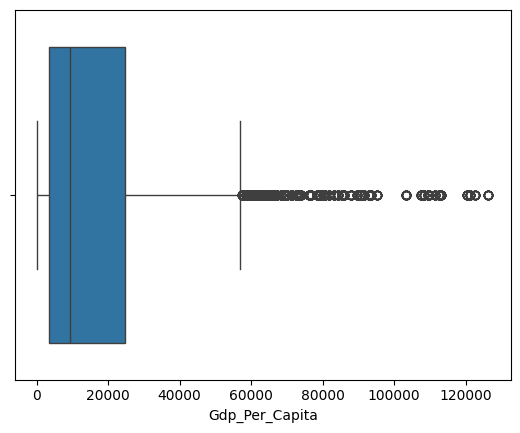

In [78]:
sns.boxplot(x=stats['Gdp_Per_Capita']);

In [79]:
# IQR rule to use for the skewed distribution
q25, q75 = np.percentile(stats['Gdp_Per_Capita'], (25,75))
iqr = q75 - q25 
min_4 = q25 - 1.5*iqr 
max_4 = q75 + 1.5*iqr
# Count of outliers
stats['Gdp_Per_Capita'].loc[stats['Gdp_Per_Capita']>max_4].count() 

1016

In [83]:
stats['Gdp_Per_Capita'].loc[stats['Gdp_Per_Capita']>max_4].value_counts()

Gdp_Per_Capita
66770    12
74055    12
76638    12
66099    12
69301    12
         ..
85397    12
80639    12
60387    12
62484    10
64708    10
Name: count, Length: 85, dtype: int64

* This values are valid GDP per capita. We will retain these values for further analysis.

In [85]:
stats.isnull().any()  # Check if there are any missing values

Country              False
Year                 False
Sex                  False
Age                  False
Suicides_No          False
Population           False
Suicides/100K_Pop    False
Hdi_For_Year          True
Gdp_For_Year         False
Gdp_Per_Capita       False
Generation           False
dtype: bool

In [87]:
# Replace missing value with median
stats["Hdi_For_Year"] = stats["Hdi_For_Year"].fillna(stats["Hdi_For_Year"].median())

In [88]:
# Check if there are any missing values after filling with mean values
stats.isnull().any()  

Country              False
Year                 False
Sex                  False
Age                  False
Suicides_No          False
Population           False
Suicides/100K_Pop    False
Hdi_For_Year         False
Gdp_For_Year         False
Gdp_Per_Capita       False
Generation           False
dtype: bool

In [89]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            27820 non-null  object 
 1   Year               27820 non-null  int64  
 2   Sex                27820 non-null  object 
 3   Age                27820 non-null  object 
 4   Suicides_No        27820 non-null  int64  
 5   Population         27820 non-null  int64  
 6   Suicides/100K_Pop  27820 non-null  float64
 7   Hdi_For_Year       27820 non-null  float64
 8   Gdp_For_Year       27820 non-null  object 
 9   Gdp_Per_Capita     27820 non-null  int64  
 10  Generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


In [99]:
stats['Gdp_For_Year'] = stats['Gdp_For_Year'].str.replace(',','')
stats['Gdp_For_Year'] = stats['Gdp_For_Year'].astype(float)


### 2. Data Analysis and Visualization (EDA)

In [100]:
stats[['Year', 'Suicides_No', 'Population',
       'Suicides/100K_Pop', 'Hdi_For_Year',
       'Gdp_For_Year', 'Gdp_Per_Capita']].corr().style.background_gradient(cmap = "RdYlGn", axis = 1)

,Year,Suicides_No,Population,Suicides/100K_Pop,Hdi_For_Year,Gdp_For_Year,Gdp_Per_Capita
Year,1.000000,-0.004546,0.008850,-0.039037,0.209036,0.094529,0.339134
Suicides_No,-0.004546,1.000000,0.616162,0.306604,0.062669,0.430096,0.061330
Population,0.008850,0.616162,1.000000,0.008285,0.057279,0.710697,0.081510
Suicides/100K_Pop,-0.039037,0.306604,0.008285,1.000000,0.037290,0.025240,0.001785
Hdi_For_Year,0.209036,0.062669,0.057279,0.037290,1.000000,0.198013,0.505505
Gdp_For_Year,0.094529,0.430096,0.710697,0.025240,0.198013,1.000000,0.303405
Gdp_Per_Capita,0.339134,0.061330,0.081510,0.001785,0.505505,0.303405,1.000000


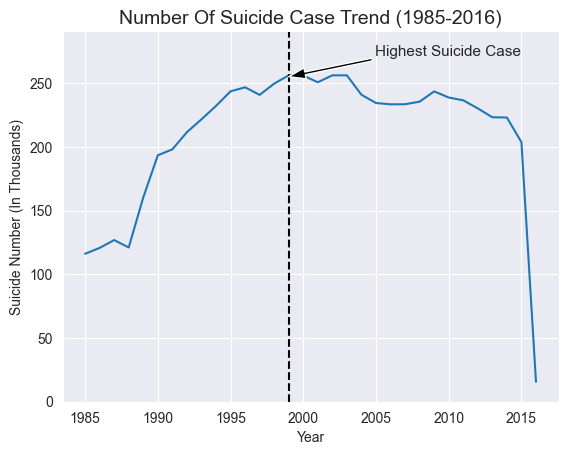

In [103]:
total_suicide = stats.groupby("Year")[["Suicides_No"]].sum()
total_suicide

sns.set_style("darkgrid")



fig, ax = plt.subplots()

ax.plot(total_suicide.index, total_suicide["Suicides_No"] / 1000);
ax.axvline(1999, c="black", ls="--")

ax.set_xlabel("Year");
ax.set_ylabel("Suicide Number (In Thousands)");
ax.set_title("Number Of Suicide Case Trend (1985-2016)", fontsize = 14);
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylim(0, 290)
ax.annotate('Highest Suicide Case', xy = (1999, 255), xytext = (2015, 280),
            arrowprops=dict(facecolor='black', width = 2, headwidth = 8),
            fontsize=11,
            horizontalalignment='right', verticalalignment='top');


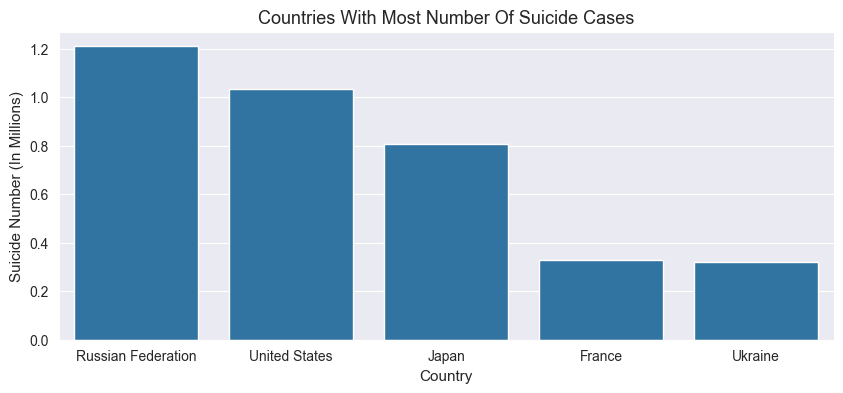

In [106]:
suicide_country = stats.groupby("Country")[["Suicides_No"]].sum().sort_values(by="Suicides_No", ascending = False).head()
suicide_country

fig, ax = plt.subplots(figsize = (10, 4))
sns.barplot(x=suicide_country.index, y=suicide_country["Suicides_No"] / 1000000, data = suicide_country);
ax.set_title("Countries With Most Number Of Suicide Cases", fontsize = 13);
ax.set_xlabel("Country", fontsize = 11);
ax.set_ylabel("Suicide Number (In Millions)", fontsize = 11);


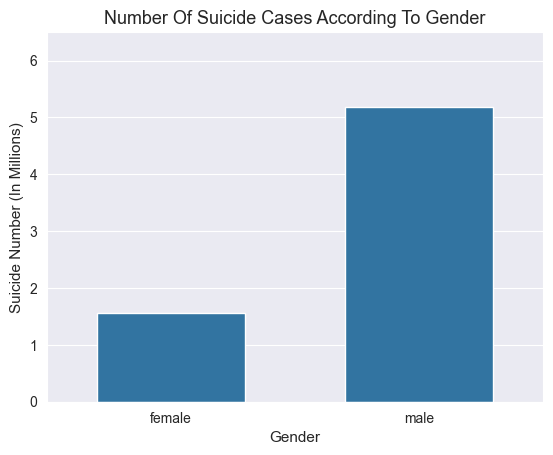

In [109]:
suicide_sex= stats.groupby("Sex")[["Suicides_No"]].sum()
suicide_sex

fig, ax = plt.subplots()
sns.barplot(x=suicide_sex.index, y=suicide_sex["Suicides_No"] / 1000000, data = suicide_sex, width = 0.6);
ax.set_title("Number Of Suicide Cases According To Gender", fontsize = 13);
ax.set_xlabel("Gender", fontsize = 11);
ax.set_ylabel("Suicide Number (In Millions)", fontsize = 11);
ax.set_ylim(0, 6.5);

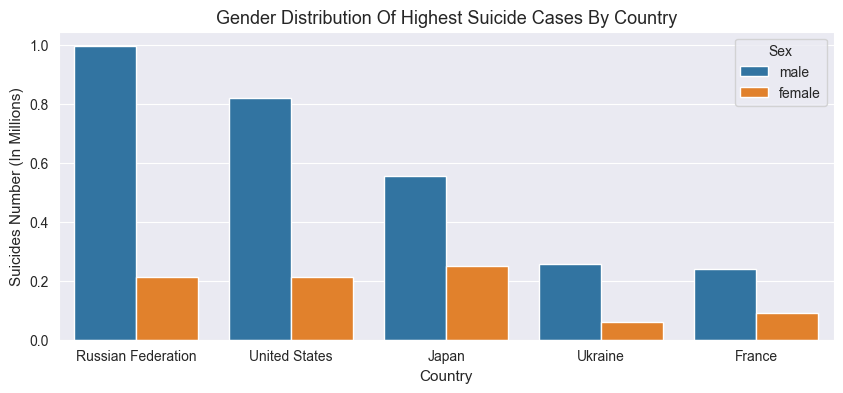

In [113]:
countries = ["Russian Federation", "United States", "Japan", "France", "Ukraine"]
suicide_sex_country = stats.loc[stats["Country"].isin(countries)].groupby(["Country", "Sex"])[["Suicides_No"]].sum().reset_index().sort_values(by = "Suicides_No", ascending = False)
suicide_sex_country 


fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = suicide_sex_country, x = suicide_sex_country["Country"], y = suicide_sex_country["Suicides_No"] / 1000000, hue = suicide_sex_country["Sex"])
ax.set_title("Gender Distribution Of Highest Suicide Cases By Country", fontsize = 13)
ax.set_xlabel("Country", fontsize = 11) 
ax.set_ylabel("Suicides Number (In Millions)", fontsize = 11);


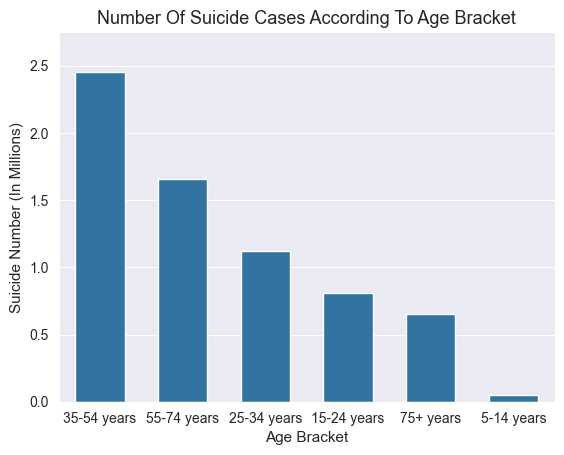

In [119]:
age_suicide = stats.groupby("Age")[["Suicides_No"]].sum().sort_values(by="Suicides_No", ascending = False)
age_suicide

fig, ax = plt.subplots()
sns.barplot(x=age_suicide.index, y=age_suicide["Suicides_No"] / 1000000, data = age_suicide, width = 0.6);
ax.set_title("Number Of Suicide Cases According To Age Bracket", fontsize = 13);
ax.set_xlabel("Age Bracket", fontsize = 11);
ax.set_ylabel("Suicide Number (In Millions)", fontsize = 11);
ax.set_ylim(0, 2.75);

 

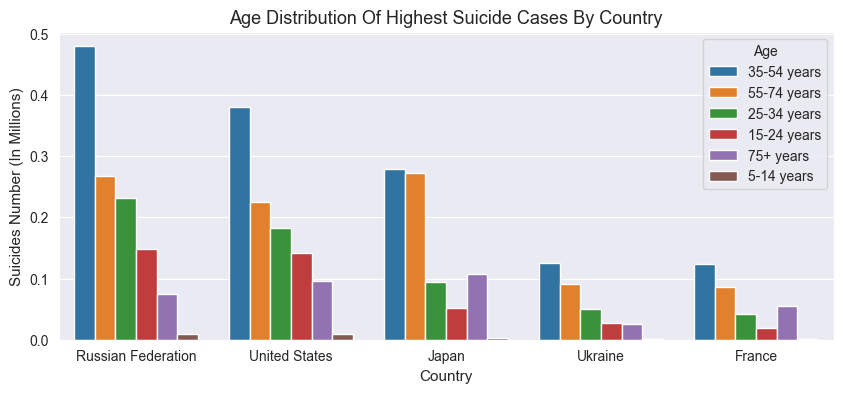

In [122]:
countries = ["Russian Federation", "United States", "Japan", "France", "Ukraine"]
suicide_age_country = stats.loc[stats["Country"].isin(countries)].groupby(["Country", "Age"])[["Suicides_No"]].sum().reset_index().sort_values(by = "Suicides_No", ascending = False)
suicide_age_country 


fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = suicide_age_country, x = suicide_age_country["Country"], y = suicide_age_country["Suicides_No"] / 1000000, hue = suicide_age_country["Age"])
ax.set_title("Age Distribution Of Highest Suicide Cases By Country", fontsize = 13)
ax.set_xlabel("Country", fontsize = 11) 
ax.set_ylabel("Suicides Number (In Millions)", fontsize = 11);

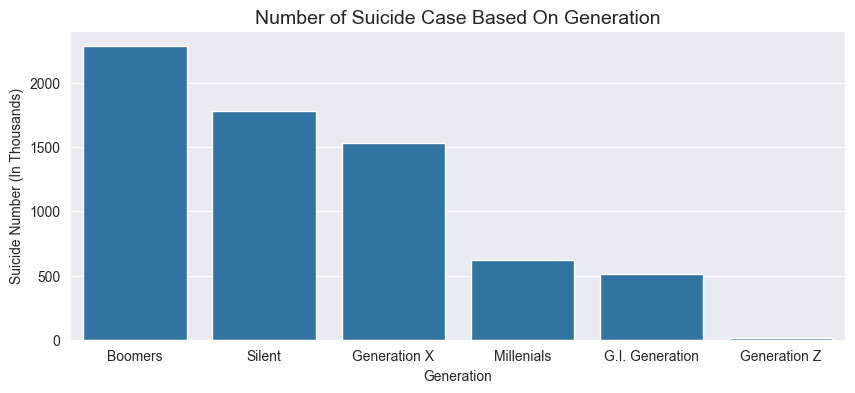

In [124]:
generation_suicides = stats.groupby("Generation")[["Suicides_No"]].sum().sort_values(by = "Suicides_No", ascending = False)
generation_suicides 

ig, ax = plt.subplots(figsize = (10,4))

sns.barplot(x = generation_suicides.index, y= generation_suicides["Suicides_No"] / 1000, data = generation_suicides );
ax.set_xlabel("Generation");
ax.set_ylabel("Suicide Number (In Thousands)");
ax.set_title("Number of Suicide Case Based On Generation", fontsize = 14);
ax.spines[["top", "right"]].set_visible(False);

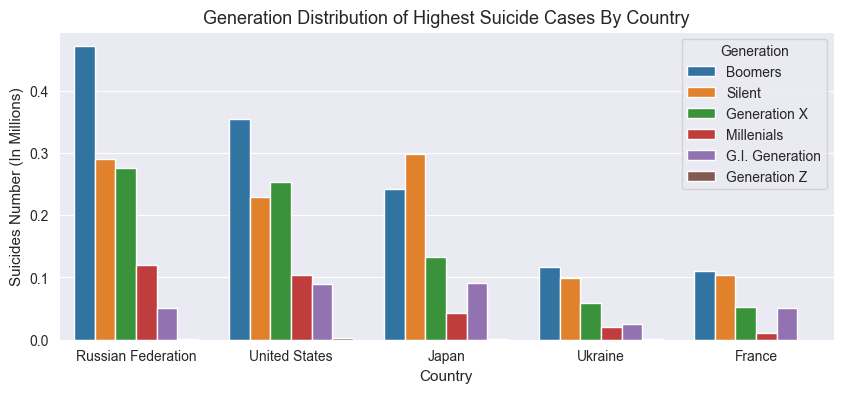

In [127]:
countries = ["Russian Federation", "United States", "Japan", "France", "Ukraine"]
suicide_generation_country = stats.loc[stats["Country"].isin(countries)].groupby(["Country", "Generation"])[["Suicides_No"]].sum().reset_index().sort_values(by = "Suicides_No", ascending = False)
suicide_generation_country 


fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = suicide_generation_country, x = suicide_generation_country["Country"], y = suicide_generation_country["Suicides_No"] / 1000000, hue = suicide_generation_country["Generation"])
ax.set_title("Generation Distribution of Highest Suicide Cases By Country", fontsize = 13)
ax.set_xlabel("Country", fontsize = 11) 
ax.set_ylabel("Suicides Number (In Millions)", fontsize = 11);

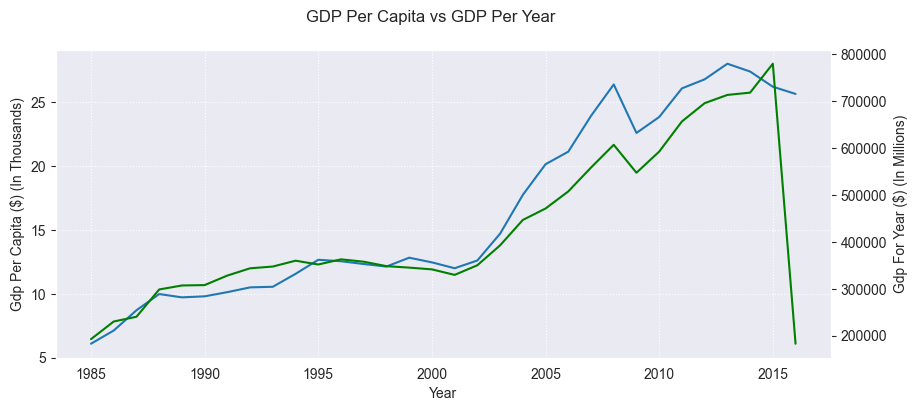

In [133]:
gdp_capita = stats.groupby("Year")[["Gdp_Per_Capita"]].mean()
gdp_capita

gdp_capita_year = stats.groupby("Year")[["Gdp_For_Year"]].mean()
gdp_capita_year

fig, ax = plt.subplots(sharex = "all", figsize = (10,4))

ax.plot(gdp_capita.index, gdp_capita["Gdp_Per_Capita"] / 1000);
ax.set_xlabel("Year");
ax.set_ylabel("Gdp Per Capita ($) (In Thousands)");
ax.grid(None)
plt.grid(which = 'both', linestyle='dotted')
ax2 = ax.twinx()

ax2.plot(gdp_capita_year.index, gdp_capita_year["Gdp_For_Year"] / 1000000, color = "green");
ax2.set_ylabel("Gdp For Year ($) (In Millions)");
ax2.grid(None)
fig.suptitle("GDP Per Capita vs GDP Per Year");


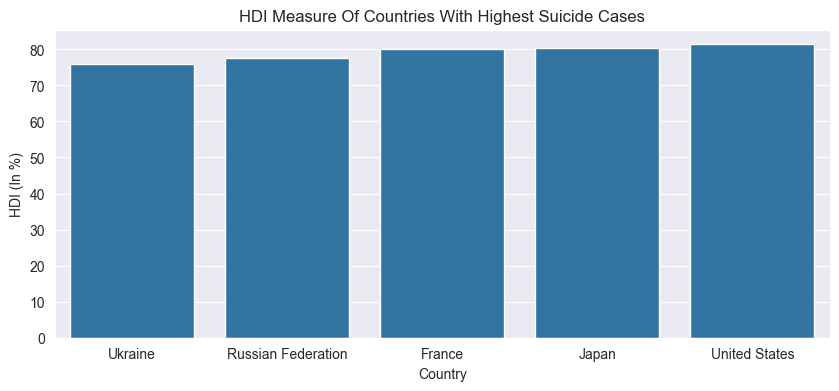

In [135]:
countries = ["Russian Federation", "United States", "Japan", "France", "Ukraine"]
HDI_suicide = stats.loc[stats["Country"].isin(countries)].groupby("Country")[["Hdi_For_Year"]].mean().sort_values(by = "Hdi_For_Year", ascending = True).head()
HDI_suicide

fig, ax = plt.subplots(figsize = (10,4))

sns.barplot(data = HDI_suicide, x = HDI_suicide.index, y = HDI_suicide["Hdi_For_Year"]*100);
ax.set_xlabel("Country");
ax.set_ylabel("HDI (In %)");
ax.set_title("HDI Measure Of Countries With Highest Suicide Cases");

C:\Users\bobby\AppData\Local\Temp\ipykernel_5188\3039906812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = HDI.index, x = HDI["Hdi_For_Year"]*100, data = HDI, palette="flare"), ;


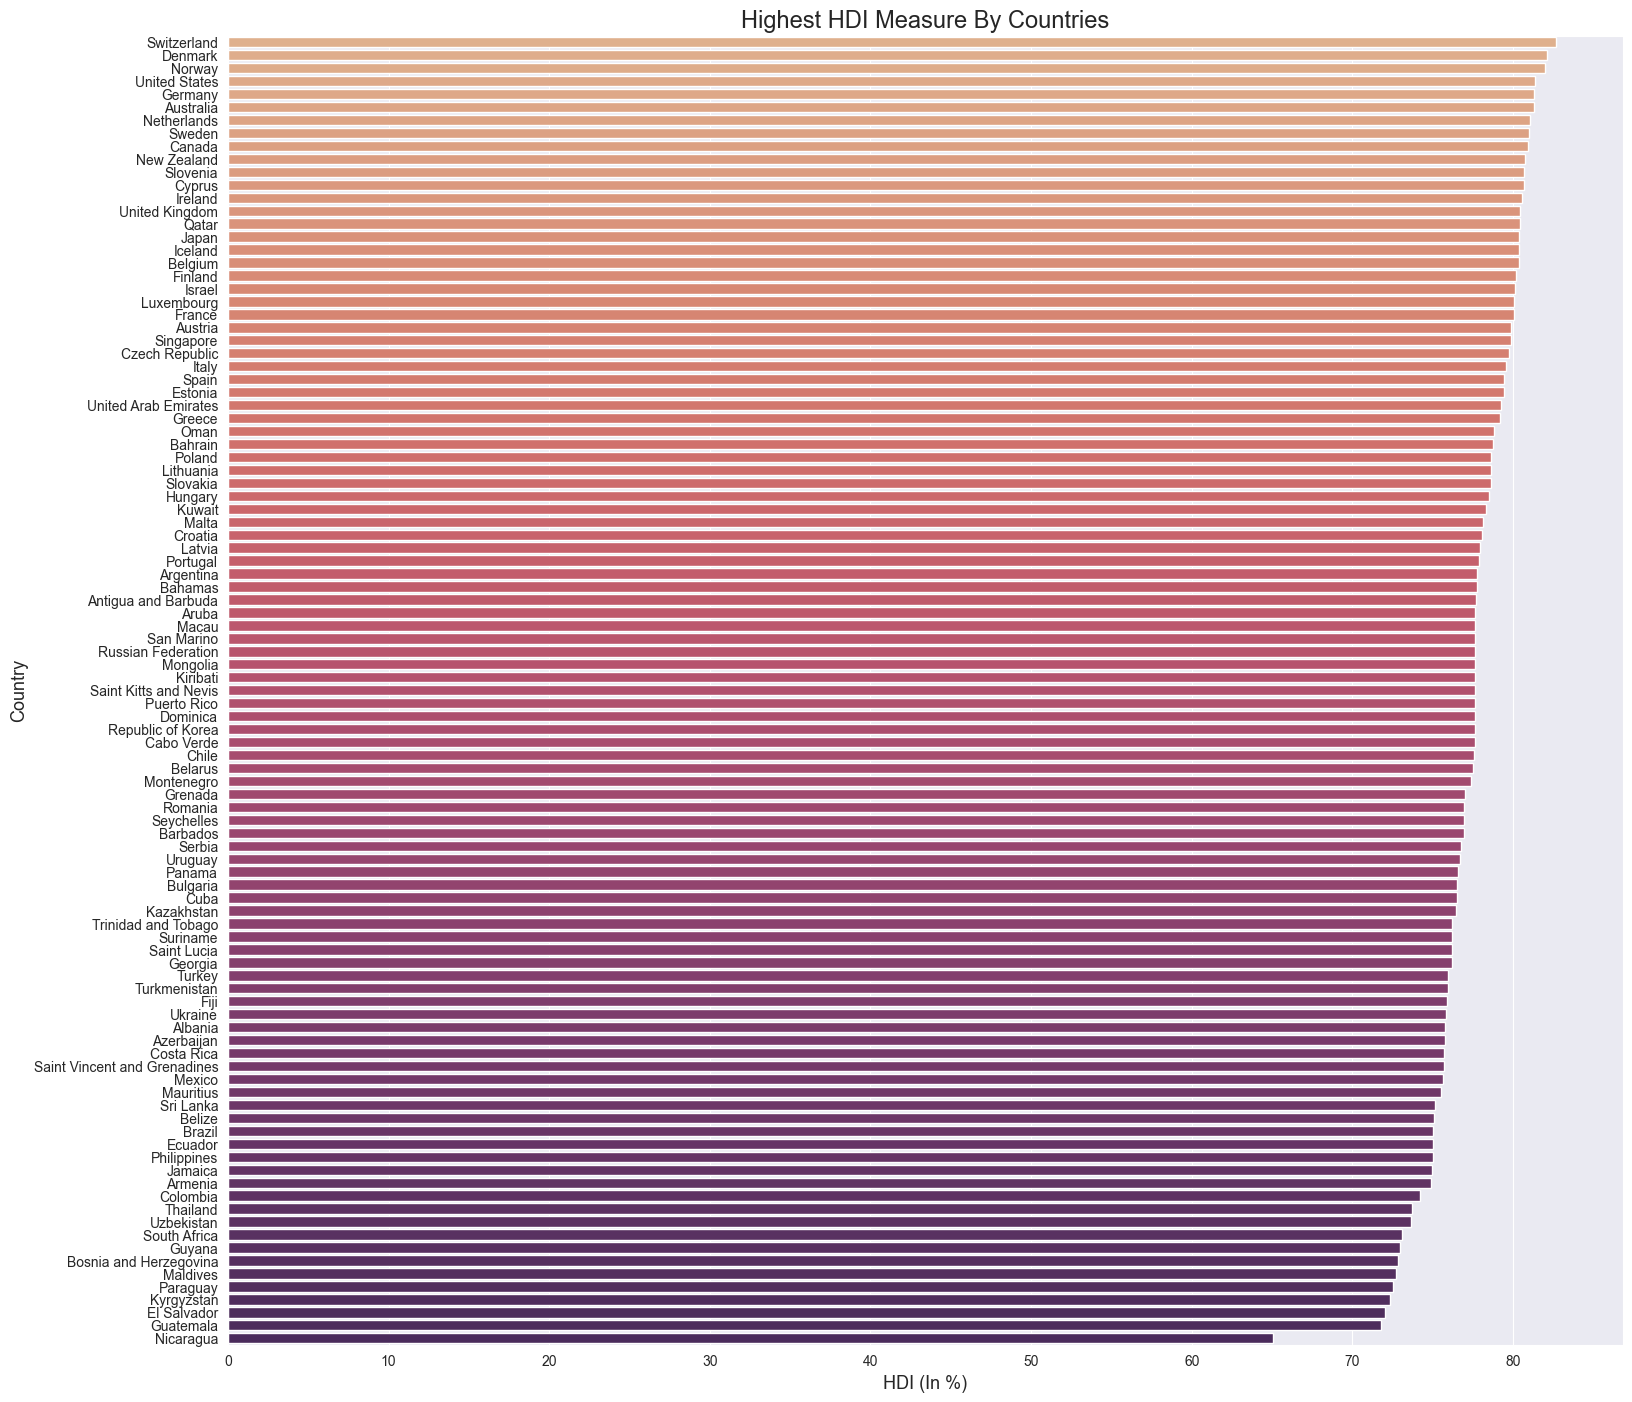

In [141]:
HDI= stats.groupby("Country")[["Hdi_For_Year"]].mean().sort_values(by = "Hdi_For_Year", ascending = False)
HDI 
fig, ax = plt.subplots(figsize = (18, 17))


sns.barplot(y = HDI.index, x = HDI["Hdi_For_Year"]*100, data = HDI, palette="flare"), ;
ax.set_xlabel("HDI (In %)", fontsize = 13);
ax.set_ylabel("Country", fontsize = 13);
ax.set_title("Highest HDI Measure By Countries", fontsize = 17);




Text(0.5, 1.0, 'Suicides/100k Population Case Trend (1985-2015)')

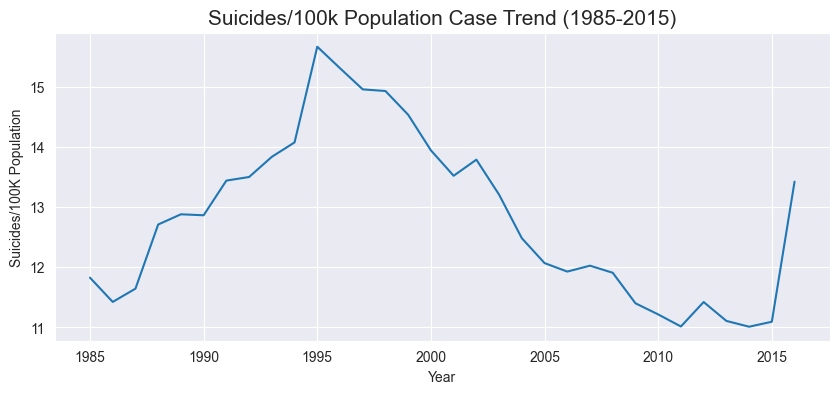

In [144]:
suicide_ratio = stats.groupby("Year")[["Suicides/100K_Pop"]].mean()
suicide_ratio


fig, ax = plt.subplots(sharex = "all", figsize = (10,4))

ax.plot(suicide_ratio.index, suicide_ratio["Suicides/100K_Pop"]);
ax.set_xlabel("Year", fontsize = 10);
ax.set_ylabel("Suicides/100K Population", fontsize = 10);
ax.set_title("Suicides/100k Population Case Trend (1985-2015)", fontsize = 15)

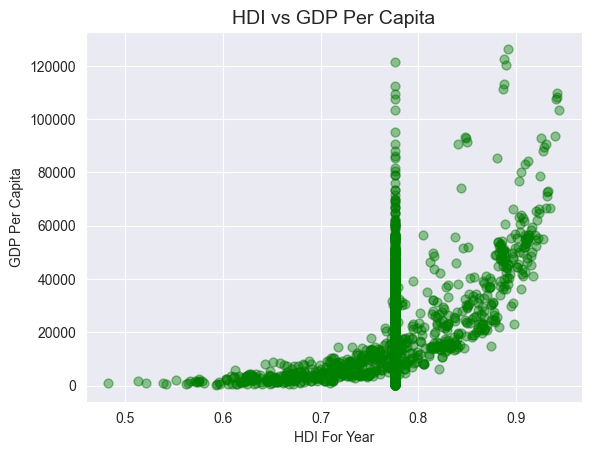

In [149]:
fig, ax = plt.subplots()


ax.scatter(x=stats["Hdi_For_Year"], y=stats["Gdp_Per_Capita"], alpha = 0.04, s = 40, color = "green")
ax.set_xlabel("HDI For Year", fontsize = 10);
ax.set_ylabel("GDP Per Capita", fontsize = 10);
ax.set_title("HDI vs GDP Per Capita", fontsize = 14);

###  Insights
From 1985 to 2016, there is a decrease trend in suicide cases. The highest suicide cases was on 1999. For suicide number per 100k population, year 1995 was the highest ratio. Russian Federation was the country with the highest suicide cases recorded. Male gender with age bracket of 35-54 years was its dominant charateristics. There was no relationship among HDI, GDP, GDP Per Capita and Suicide Number meaning the measure of standard of living of a country has nothing to do with the person commiting a suicide. 